In [1]:
from __future__ import print_function
import glob
import matplotlib
rc_fonts = {
    "font.weight": 1000,
    "font.family": "serif",
    "font.serif": ["Times"], # use latex's default
    "font.sans-serif": ["DejaVu Sans"],
    "text.usetex": True,
}
matplotlib.rcParams.update(rc_fonts)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize
import pickle

==============app: lego=============


<IPython.core.display.Javascript object>


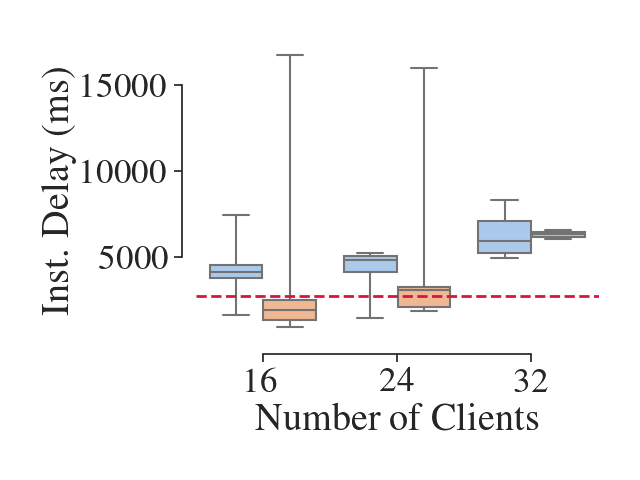

==============app: pingpong=============


<IPython.core.display.Javascript object>


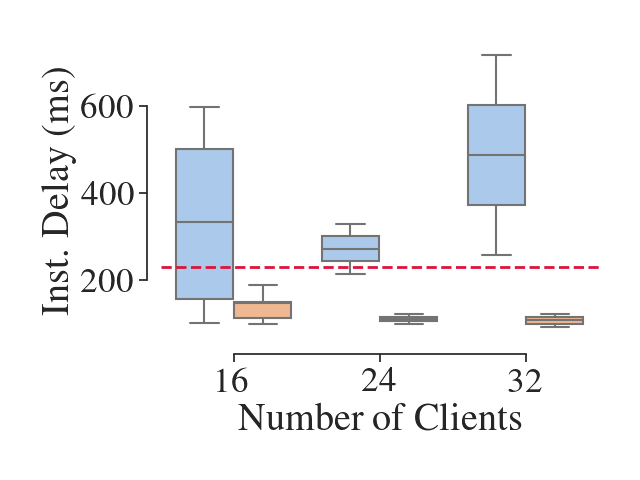

==============app: pool=============


<IPython.core.display.Javascript object>


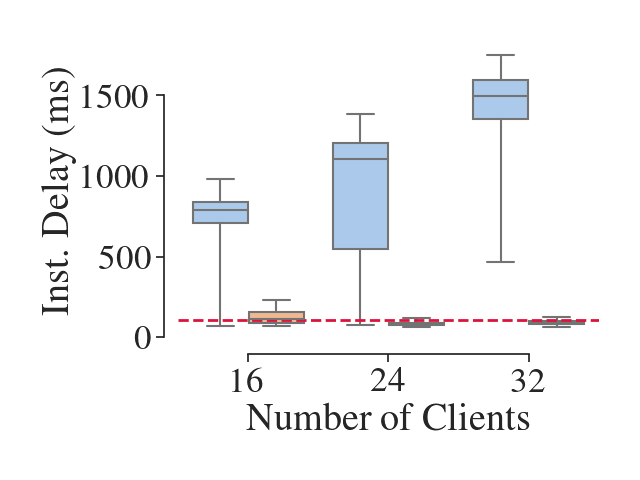

==============app: face=============


<IPython.core.display.Javascript object>


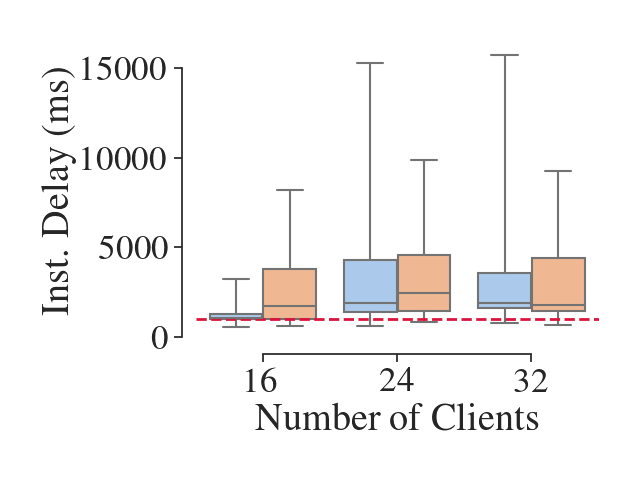

In [2]:
%matplotlib notebook
with open('sec6-inst-latency.pkl', 'rb') as f:
    data = pickle.load(f)
apps = ['lego', 'pingpong', 'pool', 'face']
loose_bound = {
    'lego': 2700, 
    'pingpong': 230, 
    'pool': 105, 
    'face': 1000}
# apps = ['face']
import seaborn as sns
sns.set(palette="pastel", style='ticks', font='Times New Roman', font_scale=2.3)

exps = [4, 6, 8]
for app in apps:
    print('==============app: {}============='.format(app))
    app_data = data[app]
    df = pd.DataFrame()
    cols = ['delay', 'exp_type', 'exp_name']
    plt.figure()
    for exp in exps:
        bn = 'sec6-baseline-{}'.format(exp)
        on = 'sec6-ours-{}'.format(exp)
        baseline_data = app_data[bn]
        ours_data = app_data[on]
        bdf = pd.DataFrame(zip(baseline_data, ['Original Gabriel']*len(baseline_data), [exp * 4] *len(baseline_data)), columns=cols)
        odf = pd.DataFrame(zip(ours_data, ['Scalable Gabriel']*len(baseline_data),  [exp * 4] *len(baseline_data)), columns =cols)
        df = df.append(bdf)
        df = df.append(odf)
    ax = sns.boxplot(x="exp_name", y="delay",
            hue="exp_type", data=df, whis=1000)
    ax.set(xlabel='Number of Clients', ylabel='Inst. Delay (ms)')
    plt.axhline(y=loose_bound[app], color='crimson', linestyle='--', linewidth=2, label='Latency Bound')
    sns.despine(offset=10, trim=True)
    ax.get_legend().remove()
    plt.tight_layout()
    plt.savefig('fig-sec6-latency-{}.pdf'.format(app), bbox_inches='tight')

<IPython.core.display.Javascript object>


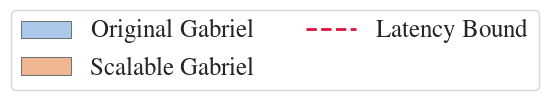

In [3]:
%matplotlib notebook

plt.figure(figsize = (5.5,1))
legs, labels = ax.get_legend_handles_labels()
legs.insert(2, legs.pop(0))
labels.insert(2, labels.pop(0))
plt.figlegend(legs, labels, loc = 'center', ncol=2, prop={'weight': 1000, 'size':18})
plt.tight_layout()
plt.savefig('figs/fig-sec6-latency-legend.pdf', bbox_inches=0)
plt.show()

       FACE      LEGO  PING PONG      POOL
0  0.124954  0.249908   0.249908  0.375229
1  0.013557  0.061280   0.369848  0.555315
2  0.014810  0.014810   0.363744  0.606635


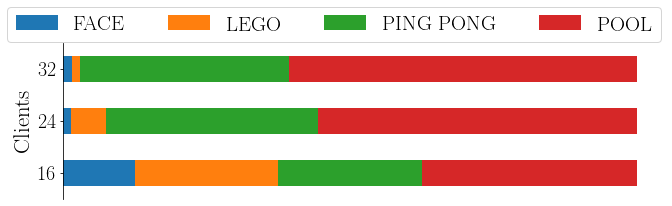

In [21]:
# use seaborn to set matplotlib font
labels = ['FACE', 'LEGO', 'PING PONG', 'POOL']
res_allocation = [
    [341, 682, 682, 1024],
    [25, 113, 682, 1024],
    [25, 25, 614, 1024]
]
df = pd.DataFrame(res_allocation, columns=labels)
#df = df.cumsum(axis=1)
df = df.divide(df.sum(axis=1), axis="index")
#df['clients'] = [16, 24, 32]
print(df)

import matplotlib.font_manager as font_manager
fig, ax = plt.subplots()
df.plot(kind='barh', stacked=True, ax=ax, sort_columns=True,  figsize=(10, 3))

ax.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.45, 1.3), prop={'weight':1000, 'size': 21})
ax.get_xaxis().set_visible(False)
ax.set_yticklabels(['16', '24', '32'])
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_ylabel('Clients', fontsize=23)
ax.tick_params(axis='y', labelsize=20)
plt.tight_layout()
plt.savefig('fig-sec6-latency-allocation.pdf', bbox_inches=0)

<IPython.core.display.Javascript object>


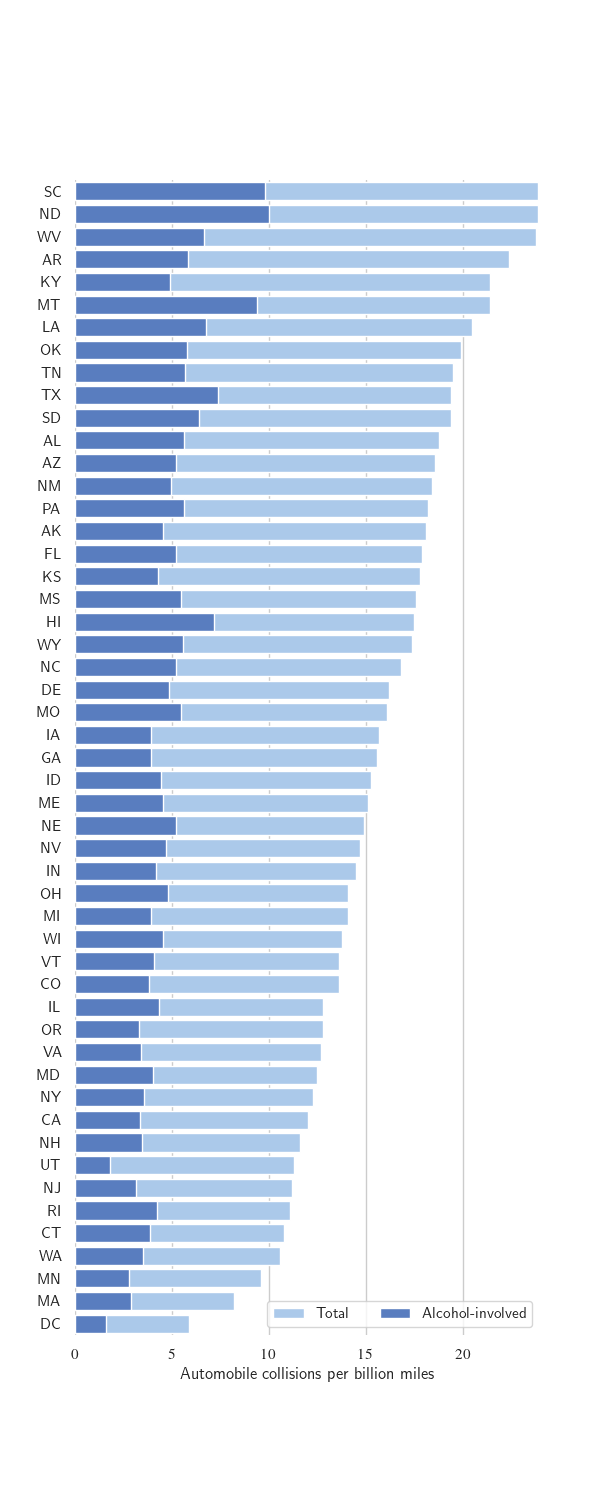

    total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
40   23.9     9.082    9.799          22.944       19.359       858.97   
34   23.9     5.497   10.038          23.661       20.554       688.75   
48   23.8     8.092    6.664          23.086       20.706       992.61   
3    22.4     4.032    5.824          21.056       21.280       827.34   
17   21.4     4.066    4.922          16.692       16.264       872.51   
26   21.4     8.346    9.416          17.976       18.190       816.21   
18   20.5     7.175    6.765          14.965       20.090      1281.55   
36   19.9     6.368    5.771          18.308       18.706       881.51   
42   19.5     4.095    5.655          15.990       15.795       767.91   
43   19.4     7.760    7.372          17.654       16.878      1004.75   
41   19.4     6.014    6.402          19.012       16.684       669.31   
0    18.8     7.332    5.640          18.048       15.040       784.55   
2    18.6     6.510    5.208          

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

print(crashes)